# Capstone Laskar AI : Penggunaan Model Random Forest dalam Mengestimasi Kemacetan Lalu Lintas dengan Memanfaatkan Data Populasi di DKI Jakarta

Kelompok : LAI25-SM077  
Anggota :
1. Muhammad Kaisan Aulia Ridwan
2. Muhammad Rayhan Khadafi
3. Siti Nur Afifah
4. Zaqi Ayuna Putri

### Persiapan

### Menyiapkan Library yang Dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Data 2023
luaswilayah_df = pd.read_csv("/content/drive/MyDrive/Dataset/Capstone Laskar AI/Data Luas Wilayah dan Kepadatan Penduduk Provinsi DKI Jakarta.csv")
penduduk23_df = pd.read_csv("/content/drive/MyDrive/Dataset/Capstone Laskar AI/Jumlah Penduduk DKI Jakarta_2023.csv")
jalan23_df = pd.read_csv("/content/drive/MyDrive/Dataset/Capstone Laskar AI/Panjang Jalan DKI Jakarta (km)_2023.csv")

# Load Data 2022
penduduk22_df = pd.read_csv("/content/drive/MyDrive/Dataset/Capstone Laskar AI/Jumlah Penduduk DKI Jakarta 2022.csv")
jalan22_df = pd.read_csv("/content/drive/MyDrive/Dataset/Capstone Laskar AI/Panjang Jalan DKI Jakarta (km) 2022.csv")

# Load Data 2021
penduduk21_df = pd.read_csv("/content/drive/MyDrive/Dataset/Capstone Laskar AI/Jumlah Penduduk DKI Jakarta 2021.csv")
jalan21_df = pd.read_csv("/content/drive/MyDrive/Dataset/Capstone Laskar AI/Panjang Jalan DKI Jakarta (km) 2021.csv")

# Load Data 2020
penduduk20_df = pd.read_csv("/content/drive/MyDrive/Dataset/Capstone Laskar AI/Jumlah Penduduk DKI Jakarta 2020.csv")
jalan20_df = pd.read_csv("/content/drive/MyDrive/Dataset/Capstone Laskar AI/Panjang Jalan DKI Jakarta (km) 2020.csv")
luaswilayah2_df = pd.read_csv("/content/drive/MyDrive/Dataset/Capstone Laskar AI/wilayah_dki_jakarta_summary.csv")

In [ ]:
# Menampilkan 5 data pertama
luaswilayah_df.head()

,tahun,nama_provinsi,nama_kabupaten,nama_kecamatan,nama_kelurahan,luas_wilayah__km2_,kepadatan__jiwa_km2_,periode_data
0,2015,PROVINSI DKI JAKARTA,JAKARTA BARAT,GROGOL PETAMBURAN,TOMANG,1.88,18178.52,2015
1,2015,PROVINSI DKI JAKARTA,JAKARTA BARAT,GROGOL PETAMBURAN,JELAMBAR,1.44,23958.61,2015
2,2015,PROVINSI DKI JAKARTA,JAKARTA BARAT,GROGOL PETAMBURAN,TANJUNG DUREN SELATAN,1.77,15910.12,2015
3,2015,PROVINSI DKI JAKARTA,JAKARTA BARAT,GROGOL PETAMBURAN,JELAMBAR BARU,0.14,307642.56,2015
4,2015,PROVINSI DKI JAKARTA,JAKARTA BARAT,GROGOL PETAMBURAN,WIJAYA KUSUMA,2.20,20360.00,2015


In [ ]:
# Menampilkan 5 data pertama
penduduk23_df.head()

,Kab/Kota,Unnamed: 1
0,NaN,Jumlah Penduduk Menurut Kabupaten/Kota di Prov...
1,NaN,2023
2,Kep Seribu,28523
3,Jakarta Selatan,2235606
4,Jakarta Timur,3079618


In [ ]:
# Menampilkan 5 data pertama
jalan23_df.head()

,Kabupaten/Kota,Panjang Jalan Negara (km) (Km),Panjang Jalan Provinsi (km) (Km),Panjang Jalan Kabupaten/Kota (km) (Km),Jumlah Panjang Jalan(km) (Km)
0,Kepulauan Seribu,NaN,NaN,NaN,NaN
1,Kota Jakarta Selatan,NaN,2000.0,NaN,2000.0
2,Kota Jakarta Timur,NaN,1518.0,NaN,1518.0
3,Kota Jakarta Pusat,NaN,692.0,NaN,692.0
4,Kota Jakarta Barat,NaN,1182.0,NaN,1182.0


In [ ]:
# Menampilkan 5 data pertama
penduduk22_df.head()

,Kab/Kota,Unnamed: 1
0,NaN,Jumlah Penduduk Menurut Kabupaten/Kota di Prov...
1,NaN,2022
2,Kep Seribu,28262
3,Jakarta Selatan,2234262
4,Jakarta Timur,3066074


In [ ]:
jalan22_df.head()

,Kabupaten/Kota,Panjang Jalan Negara (km) (Km),Panjang Jalan Provinsi (km) (Km),Panjang Jalan Kabupaten/Kota (km) (Km),Jumlah Panjang Jalan(km) (Km)
0,Kepulauan Seribu,NaN,NaN,NaN,NaN
1,Kota Jakarta Selatan,NaN,2000.0,NaN,2000.0
2,Kota Jakarta Timur,NaN,1518.0,NaN,1518.0
3,Kota Jakarta Pusat,NaN,692.0,NaN,692.0
4,Kota Jakarta Barat,NaN,1182.0,NaN,1182.0


In [ ]:
# Menampilkan 5 data pertama
penduduk21_df.head()

,Kab/Kota,Unnamed: 1
0,NaN,Jumlah Penduduk Menurut Kabupaten/Kota di Prov...
1,NaN,2021
2,Kep Seribu,27996
3,Jakarta Selatan,2232442
4,Jakarta Timur,3051866


In [ ]:
jalan21_df.head()

,Kabupaten/Kota,Panjang Jalan Negara (km) (Km),Panjang Jalan Provinsi (km) (Km),Panjang Jalan Kabupaten/Kota (km) (Km),Jumlah Panjang Jalan(km) (Km)
0,Kepulauan Seribu,NaN,NaN,NaN,NaN
1,Kota Jakarta Selatan,NaN,NaN,NaN,NaN
2,Kota Jakarta Timur,NaN,NaN,NaN,NaN
3,Kota Jakarta Pusat,NaN,NaN,NaN,NaN
4,Kota Jakarta Barat,NaN,NaN,NaN,NaN


In [ ]:
# Menampilkan 5 data pertama
penduduk20_df.head()

,Kab/Kota,Unnamed: 1
0,NaN,Jumlah Penduduk Menurut Kabupaten/Kota di Prov...
1,NaN,2020
2,Kep Seribu,27749
3,Jakarta Selatan,2226812
4,Jakarta Timur,3037139


In [ ]:
jalan20_df.head()

,Kabupaten/Kota,Panjang Jalan Negara (km) (Km),Panjang Jalan Provinsi (km) (Km),Panjang Jalan Kabupaten/Kota (km) (Km),Jumlah Panjang Jalan(km) (Km)
0,Kepulauan Seribu,NaN,NaN,NaN,NaN
1,Kota Jakarta Selatan,14.0,1986.0,NaN,2000.0
2,Kota Jakarta Timur,22.0,1496.0,NaN,1518.0
3,Kota Jakarta Pusat,0.0,692.0,NaN,692.0
4,Kota Jakarta Barat,12.0,1170.0,NaN,1182.0


In [ ]:
# Menampilkan 5 data pertama
luaswilayah2_df.head()

,Kota_Administratif,Jumlah_Penduduk,Luas_Km2,Kepadatan_Penduduk
0,Jakarta Pusat,1103357,48.13,22924.52
1,Jakarta Utara,1801963,146.66,12286.67
2,Jakarta Barat,2562383,129.54,19780.63
3,Jakarta Selatan,2409380,141.27,17055.14
4,Jakarta Timur,3095176,187.73,16487.38


### Merge Dataset

Merge Data Tahun 2020 - 2023

In [ ]:
# Fungsi normalisasi nama kabupaten
def normalisasi_kabupaten(val):
    return str(val).upper().replace("KOTA ", "").replace("KABUPATEN ", "").replace("KAB ", "").replace("ADM. ", "").replace("JAKARTA", "JAKARTA").strip()

# Tampilkan kolom setelah dibersihkan (cek lagi)
print("Kolom setelah strip:", luaswilayah_df.columns.tolist())

Kolom setelah strip: ['tahun', 'nama_provinsi', 'nama_kabupaten', 'nama_kecamatan', 'nama_kelurahan', 'luas_wilayah__km2_', 'kepadatan__jiwa_km2_', 'periode_data']


In [ ]:
# Strip kolom dari spasi jika ada
luaswilayah_df.columns = luaswilayah_df.columns.str.strip()

# Rename kolom ke standar yang akan digunakan untuk merge
luaswilayah_df = luaswilayah_df.rename(columns={
    'nama_kabupaten': 'kota',
    'nama_kecamatan': 'kecamatan',
    'nama_kelurahan': 'kelurahan',
    'luas_wilayah__km2_': 'luas_daerah',
    'kepadatan__jiwa_km2_': 'kepadatan'
})

# Ambil kolom yang dibutuhkan saja
luaswilayah_df = luaswilayah_df[['kota', 'kecamatan', 'kelurahan', 'luas_daerah', 'kepadatan']]
luaswilayah_df['kota'] = luaswilayah_df['kota'].apply(normalisasi_kabupaten)


# ================== Normalisasi Penduduk ==================
penduduk_dfs = {
    2020: penduduk20_df,
    2021: penduduk21_df,
    2022: penduduk22_df,
    2023: penduduk23_df
}
for tahun, df in penduduk_dfs.items():
    df.columns = ['kota', 'jumlah_penduduk']
    df = df.iloc[1:]  # Hapus header baris atas
    df['jumlah_penduduk'] = df['jumlah_penduduk'].astype(str).str.replace(",", "").astype(int)
    df['kota'] = df['kota'].apply(normalisasi_kabupaten)
    penduduk_dfs[tahun] = df

# ================== Normalisasi Panjang Jalan ==================
jalan_dfs = {
    2020: jalan20_df,
    2021: jalan21_df,
    2022: jalan22_df,
    2023: jalan23_df
}
for tahun, df in jalan_dfs.items():
    df.columns = [col.strip() for col in df.columns]
    df = df[['Kabupaten/Kota', 'Jumlah Panjang Jalan(km) (Km)']]
    df.columns = ['kota', 'panjang_jalan']
    df['kota'] = df['kota'].apply(normalisasi_kabupaten)
    df['panjang_jalan'] = df['panjang_jalan'].astype(str).str.replace(",", "").astype(float)
    jalan_dfs[tahun] = df

# ================== Merge Tiap Tahun ==================
merged_all = []

for tahun in [2020, 2021, 2022, 2023]:
    merged = luaswilayah_df.copy()
    merged = merged.merge(penduduk_dfs[tahun], on='kota', how='left')
    merged = merged.merge(jalan_dfs[tahun], on='kota', how='left')
    merged['tahun'] = tahun
    merged['macet'] = ((merged['kepadatan'] > 10000) & (merged['panjang_jalan'] < 1500)).astype(int)
    merged_all.append(merged)

# ================== Gabungkan Semua Tahun ==================
final_df = pd.concat(merged_all, ignore_index=True)

# Tampilkan hasil
final_df.head()

<ipython-input-19-6cc463b88bf1>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['jumlah_penduduk'] = df['jumlah_penduduk'].astype(str).str.replace(",", "").astype(int)
<ipython-input-19-6cc463b88bf1>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kota'] = df['kota'].apply(normalisasi_kabupaten)
<ipython-input-19-6cc463b88bf1>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,kota,kecamatan,kelurahan,luas_daerah,kepadatan,jumlah_penduduk,panjang_jalan,tahun,macet
0,JAKARTA BARAT,GROGOL PETAMBURAN,TOMANG,1.88,18178.52,2434511.0,1182.0,2020,1
1,JAKARTA BARAT,GROGOL PETAMBURAN,JELAMBAR,1.44,23958.61,2434511.0,1182.0,2020,1
2,JAKARTA BARAT,GROGOL PETAMBURAN,TANJUNG DUREN SELATAN,1.77,15910.12,2434511.0,1182.0,2020,1
3,JAKARTA BARAT,GROGOL PETAMBURAN,JELAMBAR BARU,0.14,307642.56,2434511.0,1182.0,2020,1
4,JAKARTA BARAT,GROGOL PETAMBURAN,WIJAYA KUSUMA,2.20,20360.00,2434511.0,1182.0,2020,1


In [ ]:
#Download Hasil Merge
final_df.to_csv("dataset_gabungan_dki.csv", index=False)

from google.colab import files
files.download("dataset_gabungan_dki.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
merge_df = pd.read_csv(r'/content/drive/MyDrive/Dataset/Capstone Laskar AI/dataset_gabungan_dki.csv') # Lokasi dataset disesuaikan dengan penempatan dilokal

### Data Understanding

In [ ]:
#menampilkan Informasi terkait dataset
merge_df.head()

,kota,kecamatan,kelurahan,luas_daerah,kepadatan,jumlah_penduduk,panjang_jalan,tahun,macet
0,JAKARTA BARAT,GROGOL PETAMBURAN,TOMANG,1.88,18178.52,2434511.0,1182.0,2020,1
1,JAKARTA BARAT,GROGOL PETAMBURAN,JELAMBAR,1.44,23958.61,2434511.0,1182.0,2020,1
2,JAKARTA BARAT,GROGOL PETAMBURAN,TANJUNG DUREN SELATAN,1.77,15910.12,2434511.0,1182.0,2020,1
3,JAKARTA BARAT,GROGOL PETAMBURAN,JELAMBAR BARU,0.14,307642.56,2434511.0,1182.0,2020,1
4,JAKARTA BARAT,GROGOL PETAMBURAN,WIJAYA KUSUMA,2.20,20360.00,2434511.0,1182.0,2020,1


In [ ]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kota             1068 non-null   object 
 1   kecamatan        1068 non-null   object 
 2   kelurahan        1068 non-null   object 
 3   luas_daerah      1068 non-null   float64
 4   kepadatan        1068 non-null   float64
 5   jumlah_penduduk  1044 non-null   float64
 6   panjang_jalan    783 non-null    float64
 7   tahun            1068 non-null   int64  
 8   macet            1068 non-null   int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 75.2+ KB


In [ ]:
merge_df.describe()

,luas_daerah,kepadatan,jumlah_penduduk,panjang_jalan,tahun,macet
count,1068.000000,1068.000000,1.044000e+03,783.000000,1068.000000,1068.000000
mean,2.449288,23946.115393,2.234695e+06,1377.168582,2021.500000,0.308989
std,2.070586,25456.631180,6.616356e+05,445.167568,1.118558,0.462293
min,0.140000,962.320000,1.049314e+06,692.000000,2020.000000,0.000000
25%,0.960000,11898.360000,1.799220e+06,1101.000000,2020.750000,0.000000
50%,1.790000,17579.120000,2.235606e+06,1182.000000,2021.500000,0.000000
75%,3.300000,29790.960000,2.470054e+06,1518.000000,2022.250000,1.000000
max,13.070000,307642.560000,3.079618e+06,2000.000000,2023.000000,1.000000


In [ ]:
# Cek missing value
merge_df.isnull().sum()

,0
kota,0
kecamatan,0
kelurahan,0
luas_daerah,0
kepadatan,0
jumlah_penduduk,24
panjang_jalan,285
tahun,0
macet,0


In [ ]:
# Cek duplikasi
print("Jumlah duplikasi: ", merge_df.duplicated().sum())

Jumlah duplikasi:  0


### Data Cleaning

In [ ]:
merge_df.isnull().sum()

,0
kota,0
kecamatan,0
kelurahan,0
luas_daerah,0
kepadatan,0
jumlah_penduduk,24
panjang_jalan,285
tahun,0
macet,0


Missing sebelum imputasi:
 jumlah_penduduk     24
panjang_jalan      285
dtype: int64

Missing setelah imputasi:
 jumlah_penduduk    0
panjang_jalan      0
dtype: int64


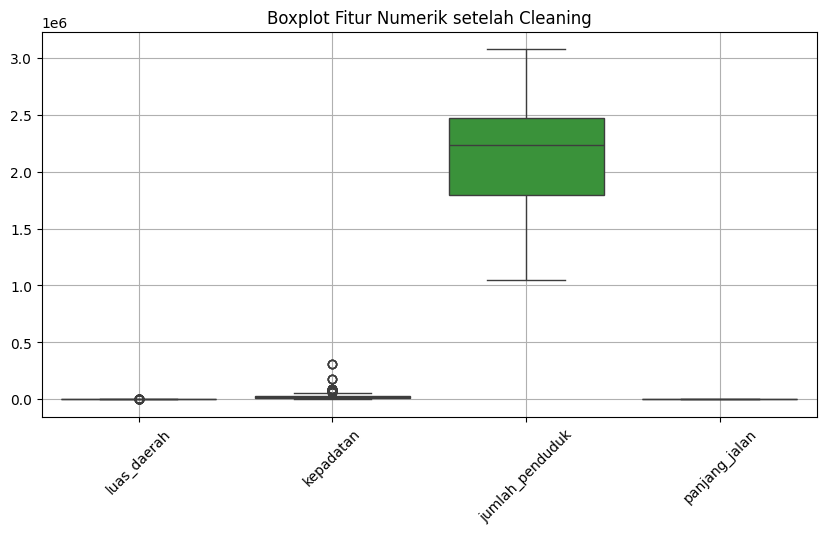

In [ ]:
# Salin dataset gabungan ke variabel baru untuk cleaning
clean_df = merge_df.copy()

# Hapus duplikat
clean_df = clean_df.drop_duplicates()

# Imputasi nilai missing untuk jumlah_penduduk & panjang_jalan
print("Missing sebelum imputasi:\n", clean_df[['jumlah_penduduk', 'panjang_jalan']].isnull().sum())

clean_df['jumlah_penduduk'] = clean_df['jumlah_penduduk'].fillna(clean_df['jumlah_penduduk'].median())
clean_df['panjang_jalan'] = clean_df['panjang_jalan'].fillna(clean_df['panjang_jalan'].median())

print("\nMissing setelah imputasi:\n", clean_df[['jumlah_penduduk', 'panjang_jalan']].isnull().sum())

# Hapus baris yang masih memiliki missing value di kolom lainnya
clean_df = clean_df.dropna(subset=['luas_daerah', 'kepadatan'])

# Visualisasi boxplot outlier
plt.figure(figsize=(10, 5))
sns.boxplot(data=clean_df[['luas_daerah', 'kepadatan', 'jumlah_penduduk', 'panjang_jalan']])
plt.title("Boxplot Fitur Numerik setelah Cleaning")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Jumlah data setelah filter outlier: 972


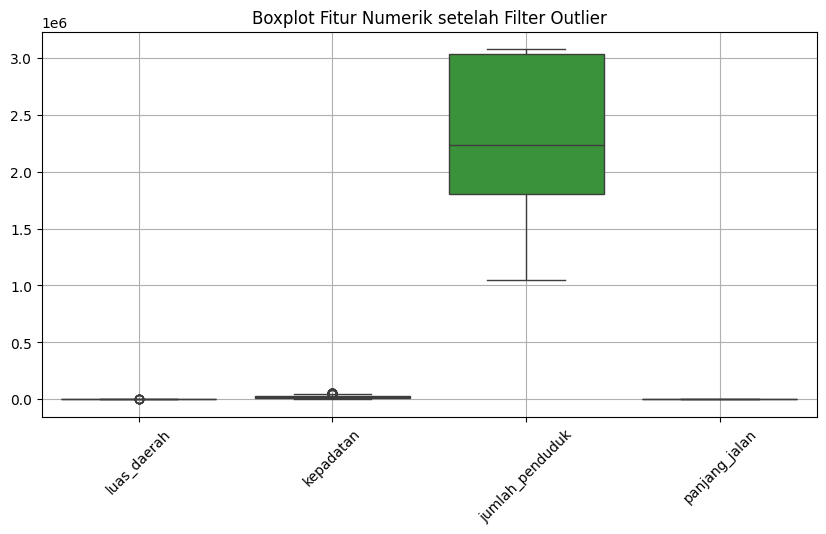

In [ ]:
# Salin dari hasil clean_df sebelumnya
filtered_df = clean_df.copy()

# Daftar kolom numerik yang akan difilter outlier-nya
kolom_numerik = ['luas_daerah', 'kepadatan', 'jumlah_penduduk', 'panjang_jalan']

for kolom in kolom_numerik:
    Q1 = filtered_df[kolom].quantile(0.25)
    Q3 = filtered_df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    filtered_df = filtered_df[(filtered_df[kolom] >= batas_bawah) & (filtered_df[kolom] <= batas_atas)]

print("Jumlah data setelah filter outlier:", len(filtered_df))

# Visualisasi ulang setelah filter
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(data=filtered_df[kolom_numerik])
plt.title("Boxplot Fitur Numerik setelah Filter Outlier")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
filtered_df.isnull().sum()

,0
kota,0
kecamatan,0
kelurahan,0
luas_daerah,0
kepadatan,0
jumlah_penduduk,0
panjang_jalan,0
tahun,0
macet,0


### Exploratory Data Analysis (Distribusi & Linearitas)

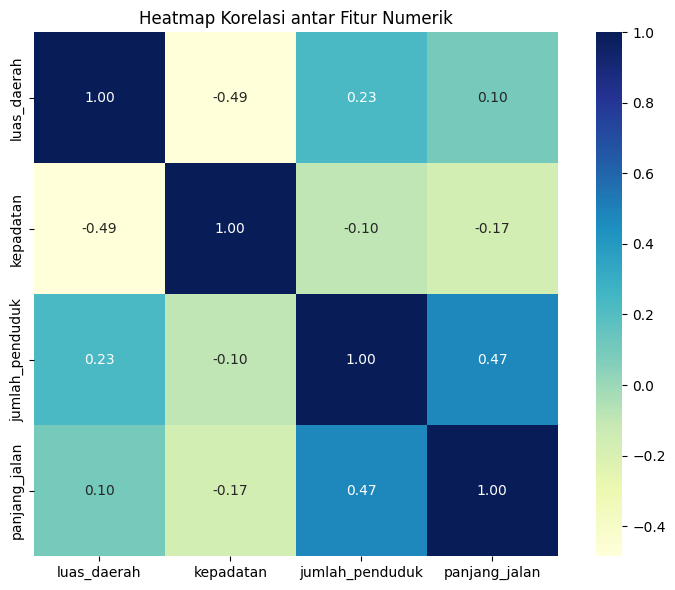

In [ ]:
#Heatmap Korelasi
numerical_cols = ['luas_daerah', 'kepadatan', 'jumlah_penduduk', 'panjang_jalan']
correlation_matrix = filtered_df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", square=True)
plt.title("Heatmap Korelasi antar Fitur Numerik")
plt.tight_layout()
plt.show()

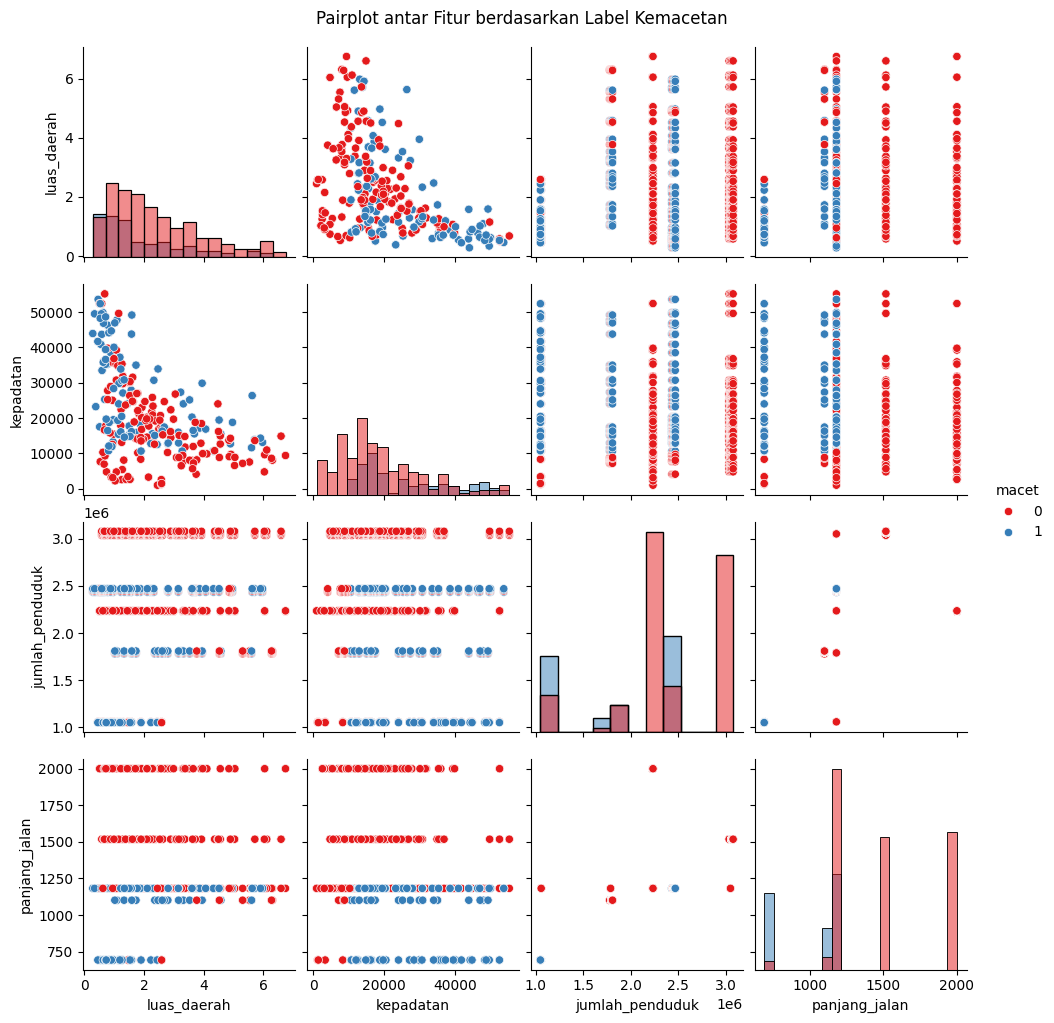

In [ ]:
# Pairplot antar fitur
sns.pairplot(filtered_df[numerical_cols + ['macet']], hue='macet', diag_kind="hist", palette='Set1')
plt.suptitle("Pairplot antar Fitur berdasarkan Label Kemacetan", y=1.02)
plt.show()

<ipython-input-36-aa75f1cf4d23>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='macet', data=filtered_df, palette='Set2')


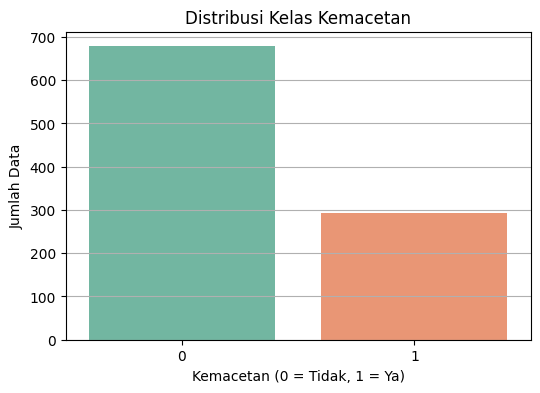

In [ ]:
# Distribusi Kelas Macet
plt.figure(figsize=(6, 4))
sns.countplot(x='macet', data=filtered_df, palette='Set2')
plt.title("Distribusi Kelas Kemacetan")
plt.xlabel("Kemacetan (0 = Tidak, 1 = Ya)")
plt.ylabel("Jumlah Data")
plt.grid(True, axis='y')
plt.show()

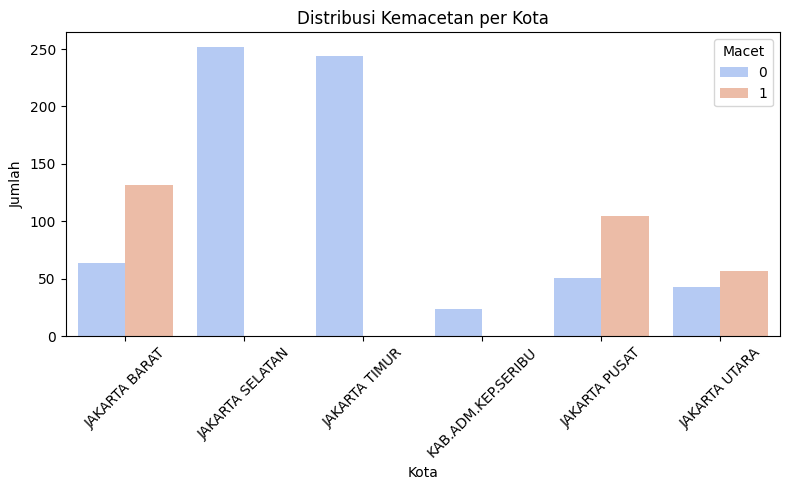

In [ ]:
# Kemacetan per Kota
plt.figure(figsize=(8, 5))
sns.countplot(x='kota', hue='macet', data=filtered_df, palette='coolwarm')
plt.title("Distribusi Kemacetan per Kota")
plt.xlabel("Kota")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.legend(title="Macet")
plt.tight_layout()
plt.show()

### Preprocessing untuk ANN

In [ ]:
# Fitur dan target
X = filtered_df[['luas_daerah', 'kepadatan', 'jumlah_penduduk', 'panjang_jalan']]
y = filtered_df['macet']  # 0 = Tidak macet, 1 = Macet

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standarisasi fitur numerik
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modeling dengan ANN

In [ ]:
# Layer Model ANN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    #layers.Dropout(0.2),  # Tambahkan dropout untuk menghindari overfitting
    layers.Dense(128, activation='relu'),
    #layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output sigmoid untuk binary classification
])

#Kompilasi Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Training Model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2, # Label target biner (kemacetan, 0 = tidak macet atau 1 = macet).
    epochs=200, # Jumlah iterasi penuh melintasi seluruh dataset training sebanyak 200 kali.
    batch_size=16, # 	Model akan memperbarui bobotnya setiap melihat 16 sampel
    verbose=1 # Menampilkan progress bar pelatihan di console.
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6913 - loss: 0.6721 - val_accuracy: 0.7500 - val_loss: 0.6289
Epoch 2/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6951 - loss: 0.6276 - val_accuracy: 0.7564 - val_loss: 0.5847
Epoch 3/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7148 - loss: 0.5824 - val_accuracy: 0.7821 - val_loss: 0.5351
Epoch 4/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7398 - loss: 0.5530 - val_accuracy: 0.8141 - val_loss: 0.4901
Epoch 5/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7706 - loss: 0.5157 - val_accuracy: 0.8269 - val_loss: 0.4545
Epoch 6/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8196 - loss: 0.4659 - val_accuracy: 0.7885 - val_loss: 0.4290
Epoch 7/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7958 - loss: 0.4535 - val_accuracy: 0.8013 - val_loss: 0.4064
Epoch 8/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7980 - loss: 0.4241 - val_accuracy: 0.8269 - 

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,845 (296.27 KB)

 Trainable params: 25,281 (98.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 50,564 (197.52 KB)

### Evaluasi


🎯 Akurasi Model ANN di data testing: 0.9128
📉 Loss Model ANN di data testing: 0.1576


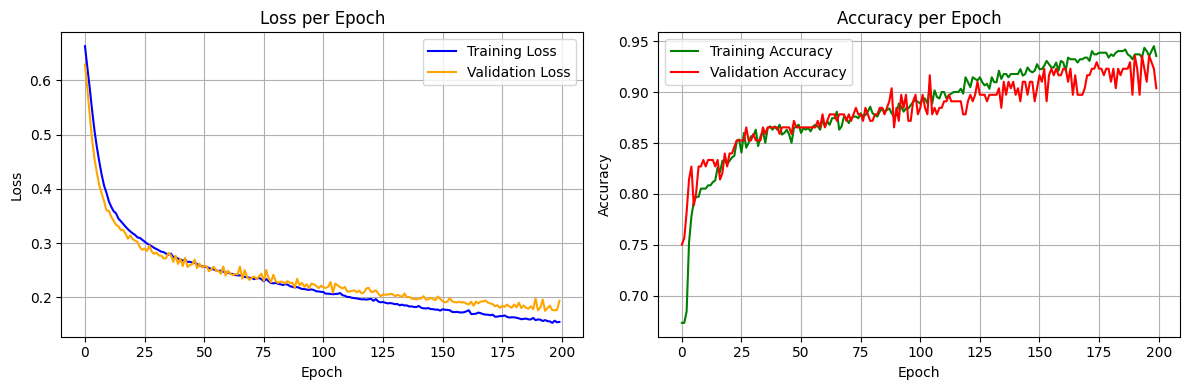

In [ ]:
# Evaluasi model di data uji
loss, acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\n🎯 Akurasi Model ANN di data testing: {acc:.4f}")
print(f"📉 Loss Model ANN di data testing: {loss:.4f}")

# Visualisasi kurva training loss dan akurasi
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot Loss
ax[0].plot(history.history['loss'], label='Training Loss', color='blue')
if 'val_loss' in history.history:
    ax[0].plot(history.history['val_loss'], label='Validation Loss', color='orange')
ax[0].set_title('Loss per Epoch')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)

# Plot Accuracy
ax[1].plot(history.history['accuracy'], label='Training Accuracy', color='green')
if 'val_accuracy' in history.history:
    ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
ax[1].set_title('Accuracy per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
model.save("model_kemacetan.h5")
from google.colab import files
files.download("model_kemacetan.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>